# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

# I/P

* *Use these values for input*  

  - **Sector 05:**  
Period = 19.1047121985    
tdepth = 0.0438986184**2
   
  - **Sector 06:**  
Period = 19.1047087965  
tdepth = 0.0351684513**2

  - **Sector 32:**  
Period = 19.1027809578  
tdepth = 0.0400356117**2
   
  - **Sector 33:**  
Period = 19.1144863082   
tdepth = 0.0404838546**2

In [2]:
ID = 192790476
sectors = np.array([5])

period = 19.1047121985
tdepth = 0.0438986184**2

lc = pd.read_csv("TOI_2459_05.csv", header=None)

# Downloading & Visualizing Data

In [4]:
target = tr.target(ID=ID, sectors=sectors)

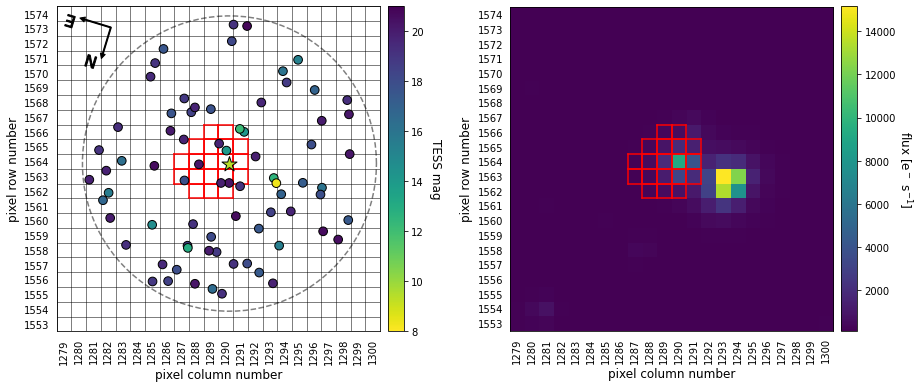

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,192790476,9.3951,8.350,7.741,7.574,82.142839,-39.373118,0.66,0.675093,4195.0,27.285000,0.000,0.000
1,192790481,14.0087,13.260,12.856,12.799,82.146237,-39.377663,0.90,0.743058,5243.0,1.799330,18.900,149.972
2,734967866,20.3842,NaN,NaN,NaN,82.140075,-39.365766,NaN,NaN,NaN,0.571818,27.562,343.794
3,734967868,19.8672,NaN,NaN,NaN,82.144043,-39.364863,NaN,NaN,NaN,NaN,29.904,6.435
4,734967863,19.7792,NaN,NaN,NaN,82.150868,-39.379488,NaN,NaN,NaN,1.929210,32.016,135.747
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,734967884,20.5827,NaN,NaN,NaN,82.078322,-39.356635,NaN,NaN,NaN,NaN,189.115,288.266
72,734967797,20.7853,NaN,NaN,NaN,82.154785,-39.426928,NaN,NaN,NaN,NaN,196.549,170.270
73,192798065,19.1225,16.445,15.776,14.967,82.161632,-39.425958,NaN,NaN,NaN,NaN,197.279,164.639
74,192798132,18.8858,16.300,15.585,15.602,82.162773,-39.320061,NaN,NaN,NaN,NaN,198.904,16.208


In [5]:
ap = np.array([[1288, 1562], [1289, 1562], [1290, 1562], [1287, 1563], 
               [1288, 1563], [1289, 1563], [1290, 1563], [1291, 1563], 
               [1287, 1564], [1288, 1564], [1289, 1564], [1290, 1564], 
               [1291, 1564], [1288, 1565], [1289, 1565], [1290, 1565], 
               [1291, 1565], [1289, 1566], [1290, 1566]])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [6]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,192790476,9.3951,8.350,7.741,7.574,82.142839,-39.373118,0.66,0.675093,4195.0,27.285000,0.000,0.000,9.556570e-01,0.002017
1,192790481,14.0087,13.260,12.856,12.799,82.146237,-39.377663,0.90,0.743058,5243.0,1.799330,18.900,149.972,1.349675e-02,0.142782
2,734967866,20.3842,NaN,NaN,NaN,82.140075,-39.365766,NaN,NaN,NaN,0.571818,27.562,343.794,3.090770e-05,0.000000
3,734967868,19.8672,NaN,NaN,NaN,82.144043,-39.364863,NaN,NaN,NaN,NaN,29.904,6.435,5.683904e-05,0.000000
4,734967863,19.7792,NaN,NaN,NaN,82.150868,-39.379488,NaN,NaN,NaN,1.929210,32.016,135.747,6.427565e-05,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,734967884,20.5827,NaN,NaN,NaN,82.078322,-39.356635,NaN,NaN,NaN,NaN,189.115,288.266,9.609232e-28,0.000000
72,734967797,20.7853,NaN,NaN,NaN,82.154785,-39.426928,NaN,NaN,NaN,NaN,196.549,170.270,8.536028e-25,0.000000
73,192798065,19.1225,16.445,15.776,14.967,82.161632,-39.425958,NaN,NaN,NaN,NaN,197.279,164.639,5.637986e-24,0.000000
74,192798132,18.8858,16.300,15.585,15.602,82.162773,-39.320061,NaN,NaN,NaN,NaN,198.904,16.208,2.397260e-21,0.000000


In [7]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(target.stars['ID'][i])

192790481
192790482
192790483
192790473


# Calculating FPP & NFPP

In [8]:
%%time
# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

#lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)#.bin(time_bin_size=lc_binsize)

target.calc_probs(time = lc.time.value, 
                  flux_0 = lc.flux.value, 
                  flux_err_0 = np.mean(lc.flux_err.value), 
                  P_orb = P_orb,
                  exptime = 0.0013888888888889)

Calculating TP scenario probabilitiey for 192790476.
Calculating EB and EBx2P scenario probabilities for 192790476.
Calculating PTP scenario probability for 192790476.
Calculating PEB and PEBx2P scenario probabilities for 192790476.
Calculating STP scenario probability for 192790476.
Calculating SEB and SEBx2P scenario probabilities for 192790476.
Calculating DTP scenario probability for 192790476.
Calculating DEB and DEBx2P scenario probabilities for 192790476.
Calculating BTP scenario probability for 192790476.
Calculating BEB and BEBx2P scenario probabilities for 192790476.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 192790481.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 192790482.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 192790483.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 192790473.
Wall time: 13min 57s


In [9]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.006428963581432301
NFPP =  0.00332373239293027


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,192790476,TP,0.660000,0.675093,19.104712,89.988540,0.009794,0.313745,294.340861,3.400788,0.000000,0.000000,7.771299e-01
1,192790476,EB,0.660000,0.675093,19.104712,87.420562,1.532362,0.304738,70.806372,0.000000,0.617441,0.600461,3.917403e-96
2,192790476,EBx2P,0.660000,0.675093,38.209424,88.966967,0.674427,0.615346,152.363071,0.000000,0.650647,0.674215,1.138889e-21
3,192790476,PTP,0.660000,0.675093,19.104712,89.886997,0.074792,0.171278,357.591023,3.451802,0.000000,0.000000,7.774879e-02
4,192790476,PEB,0.660000,0.675093,19.104712,87.609177,1.688997,0.173081,62.640308,0.000000,0.603034,0.597236,4.868242e-91
5,192790476,PEBx2P,0.660000,0.675093,38.209424,89.108498,0.782815,0.656388,190.935505,0.000000,0.650740,0.674329,3.351449e-09
6,192790476,STP,0.631379,0.650625,19.104712,89.217645,0.509192,0.065674,116.485465,5.184081,0.000000,0.000000,2.823523e-03
7,192790476,SEB,0.149526,0.181077,19.104712,89.700566,0.383702,0.553813,191.623912,0.000000,0.032256,0.100000,2.092043e-11
8,192790476,SEBx2P,0.257903,0.281593,38.209424,89.477734,0.881013,0.714848,206.022987,0.000000,0.254535,0.278650,7.976410e-05
9,192790476,DTP,0.660000,0.675093,19.104712,89.575347,0.417940,0.454907,272.376352,3.385309,0.000000,0.000000,1.386924e-01


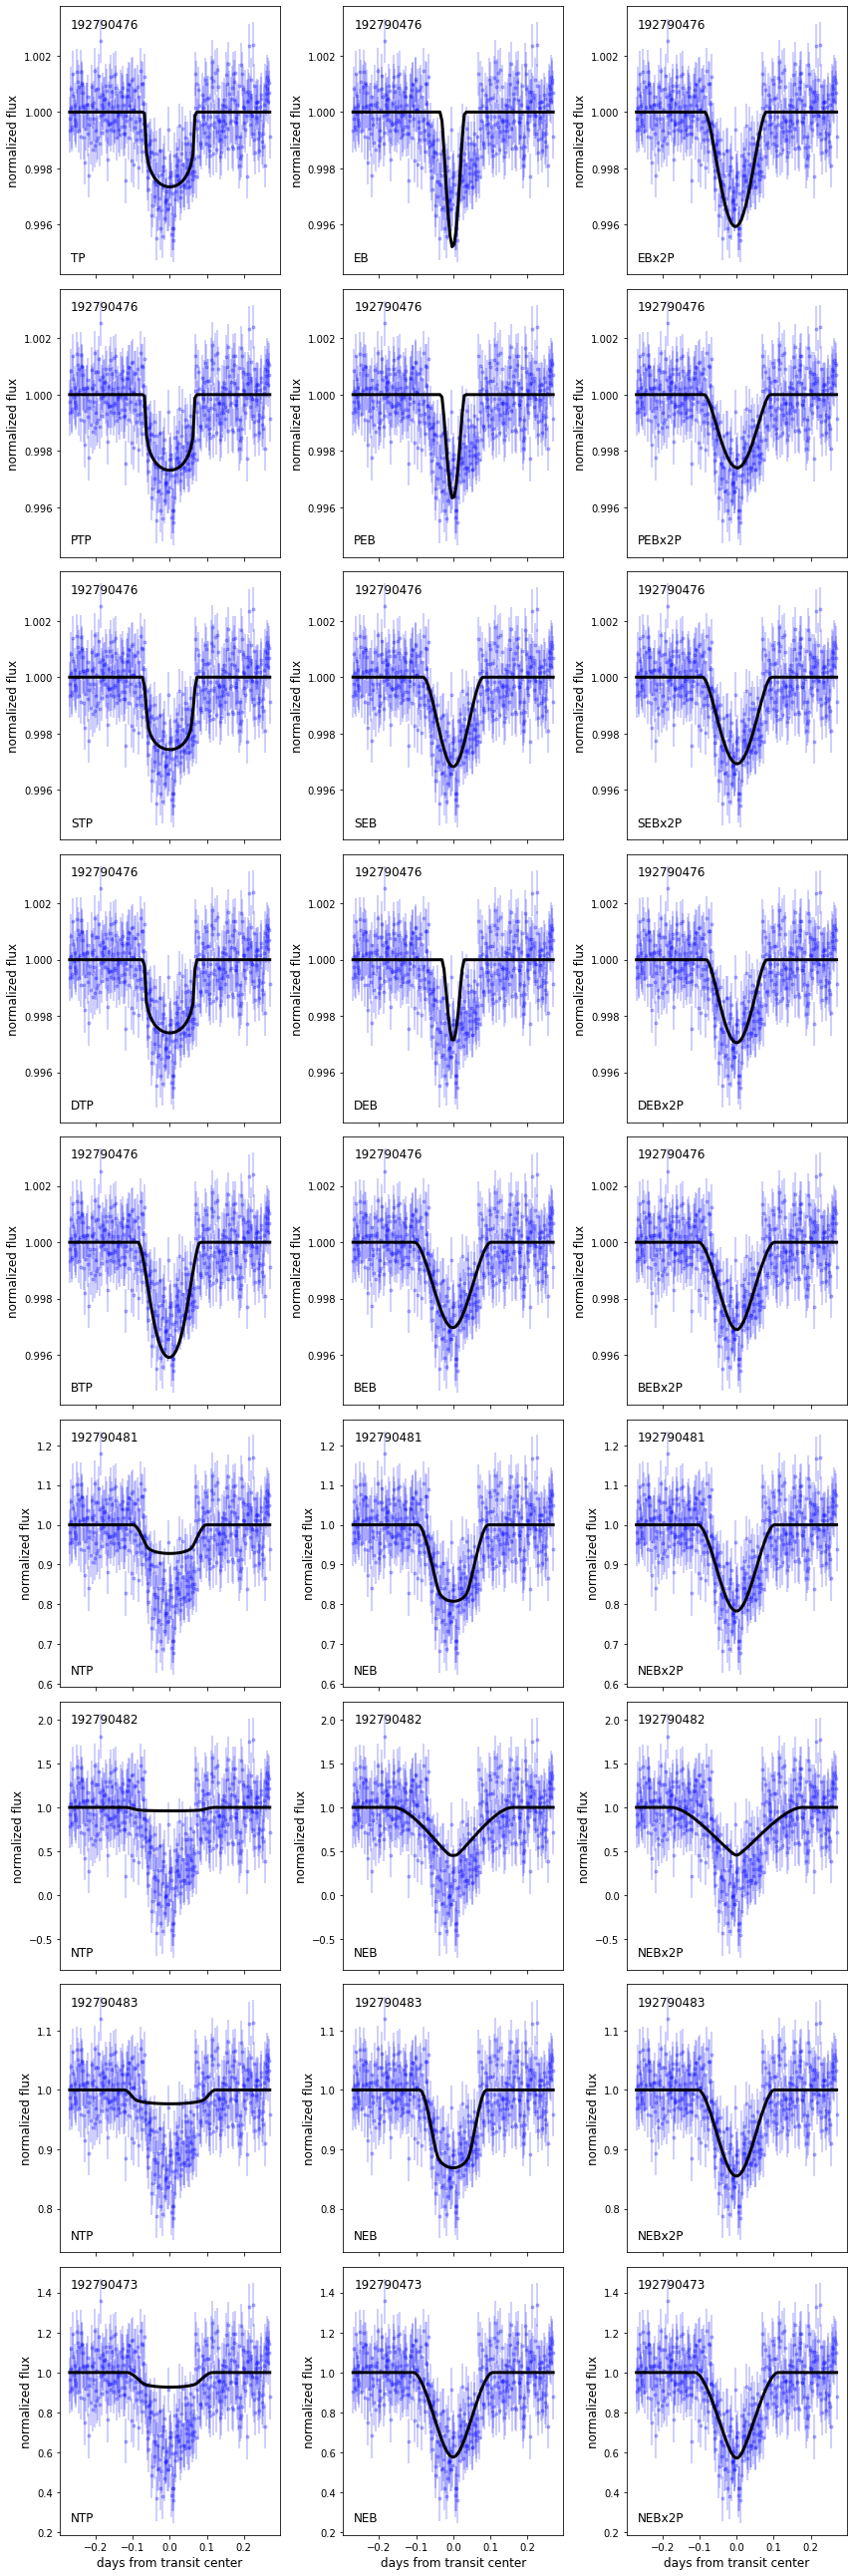

In [10]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))